In [1]:
import glob
import numpy as np
import pandas as pd
from collections import defaultdict
from datetime import datetime
import pandas as pd

## 学習で求めたパラメータをCSVで保存

In [36]:
# item vector
H = np.load('npy/itemVector.npy')
print(H.shape)
np.savetxt('csv/item_vec.csv', H, delimiter=',')

(9066, 10)


In [4]:
#  user vector
R = np.load('npy/userVector.npy')
print(R.shape)
np.savetxt('csv/user_vec.csv', R, delimiter=',')

In [72]:
R[607,:]

array([-0.00388712,  0.02010423, -0.0165873 ,  0.01177364,  0.05620144,
        0.0253511 , -0.01974786, -0.03108571,  0.00463365, -0.06389056])

In [7]:
# beta : アイテムのバイアス項
beta = np.load('npy/beta.npy')
print(beta.shape)
np.savetxt('csv/beta_vec.csv', beta, delimiter=',')

In [9]:
beta[4204]

0.719573038040644

In [37]:
# 全ユーザに共通のベクトル
r = np.load('npy/userGrobalVector.npy')
print(r.shape)

(10,)


In [13]:
r

array([-0.11797962, -0.16823558, -0.02466661, -0.11839086, -0.11872313,
       -0.14597531,  0.00906381,  0.02189914,  0.02810942,  0.10357613])

## Prediction

In [21]:
def TransPredict(user, pre, cur):
    return - beta[cur] - np.sum(np.square(H[pre,:] + r + R[user,:] - H[cur,:]))

In [64]:
TransPredict(262, 132, 415)

0.5301707279977685

In [60]:
TransPredict(607, 132, 415)

0.5984190800772642

In [62]:
TransPredict(400, 132, 415)

0.5442157143416805

## PCA で次元圧縮する

In [16]:
from time import time
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

## user_vec

In [39]:
userVector = np.load('npy/userVector.npy')
pca = PCA(n_components=2)
x_pca = pca.fit_transform(userVector)

In [19]:
user_vec_num =  x_pca.shape[0]

In [20]:
X = []
Y = []

for user in range(0, user_vec_num):
    X.append(x_pca[user][0])
    Y.append(x_pca[user][1])

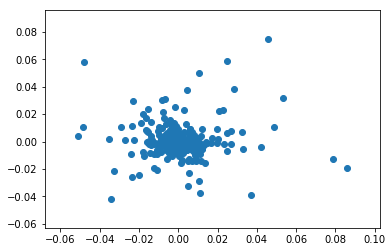

In [21]:
# X, Y の散布図をプロット
plt.scatter(X, Y) 
plt.show()

In [22]:
user_id = list(range(0,user_vec_num))

In [23]:
df_user_vec = pd.DataFrame(
    data={
        'user_id' : user_id,
        'x' : X,
        'y' : Y
    },
    columns=['user_id', 'x', 'y']
)

In [34]:
df_user_vec.to_csv('csv/user_vec_2dim.csv')

## item_vec

In [38]:
itemVector = np.load("npy/itemVector.npy",)

In [26]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(itemVector)

In [27]:
item_vec_num =  x_pca.shape[0]

In [28]:
X = []
Y = []

for item in range(0, item_vec_num):
    X.append(x_pca[item][0])
    Y.append(x_pca[item][1])

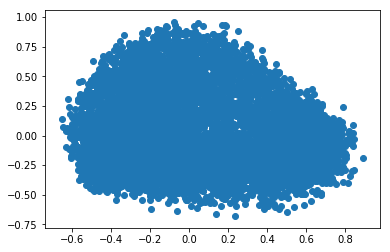

In [29]:
# X, Y の散布図をプロット
plt.scatter(X, Y) 
plt.show()

In [30]:
movie_fix_id = list(range(0,item_vec_num))

In [31]:
df_item_vec = pd.DataFrame(
    data={
        'movie_fix_id' : movie_fix_id,
        'x' : X,
        'y' : Y
    },
    columns=['movie_fix_id', 'x', 'y']
)

In [35]:
df_item_vec.to_csv('csv/item_vec_2dim.csv')